# 教養としてのアルゴリズムとデータ構造

* 以下の各問について、問の次（もしくはその次）にあるコードセルに解答すること。
    * 特に指定がある場合を除いて複数のセルに分けて解答してはならない。
* 全ての解答を終えた後に必ずリスタートを実行し、上のセルから順番に実行して各解答が正しく動くことを確認すること。
 * ただし、ローカル環境で解答する場合、 `!wget...` の記載のあるセルは実行しなくてよい。 
* 提出にあたっては、各当該のセルに解答のコードを記入し、それを実行した結果を表示させた後に、保存したこのファイルをITC-LMS経由で提出すること。
* 解答のコードには適宜コメントを入れること。
* 受講者間の協力は原則許可しない。
* 解答がコピペと判断された場合、その解答（コピペ元も含めて）は0点となる可能性があるので注意すること。
* 特に指定がない限りモジュールを用いて解答してはならない。


<b><font color="red">
各問に解答するにあたり、以下の点に注意して下さい。

1. 隣接リストは授業で配布したスライド (03_Tree.ppt, 14ページ) の形式に従うものとします。
 * 例えば、`[[1,2,3], [4, 5], [6, 7], [], [8, 9, 10], [11], [12, 13], [], [], [], [], [], [], []]` の様な値です。
2. 解答するのに `networkx` を使用してはいけません。
</font></b>

* ローカル環境で行う場合、課題によってはデータを別にダウンロードする必要があります。
* Colaboratoryを利用して課題を行う場合には、最初に以下のセルを実行して下さい。

In [1]:
!wget https://drive.google.com/uc?id=1f5tjyfqDgcoHYyqedfhRKrmZ-eOGivX7 -O utaadevalcpx.zip
!unzip utaadevalcpx.zip

fish: No matches for wildcard 'https://drive.google.com/uc?id=1f5tjyfqDgcoHYyqedfhRKrmZ-eOGivX7'. See `help expand`.
wget https://drive.google.com/uc?id=1f5tjyfqDgcoHYyqedfhRKrmZ-eOGivX7 -O utaadevalcpx.zip
     ^
unzip:  cannot find or open utaadevalcpx.zip, utaadevalcpx.zip.zip or utaadevalcpx.zip.ZIP.


# 第3回基礎課題

In [2]:
str_exfilename = "basic3.ipynb" # ファイル名を変更している場合、ここをその名前に変更する必要があります（ローカル環境のみ/Colab環境では使用しませんが実行はして下さい

## 1. 葉の一覧の取得


木構造 $T$ を表す隣接リスト `list_adjlist` が引数として与えられたとき、全ての葉の名前を格納したリスト `list_leaf` を返す関数 `getLeaves` を作成して下さい。以下の点に注意して解答して下さい。

1. 各点は `0` 以上の整数で表されます。
2. 根を表す番号は `0` です。

なお、各値の大きさは以下の通りとします。
* $n =$ $T$ の頂点の数

以下のセルの `...` のところを書き換えて解答して下さい。

In [3]:
### この行のコメントを改変してはいけません %3-1% ### 
#解答用セル
def getLeaves(list_adjlist):
    list_leaf = []
    # 子がいなかったら葉として追加
    for i in range(len(list_adjlist)):
        if list_adjlist[i] == []:
            list_leaf.append(i)
    return list_leaf

以下のセルを実行して `True` が出ることを確認して下さい。 

In [2]:
list_adjlist_test1=[[1, 2], [], [3, 4], [], []]
print(sorted(getLeaves(list_adjlist_test1))==[1, 3, 4])
list_adjlist_test2=[[1, 2, 3], [4, 5], [6, 7, 8, 9], [], [], [10], [], [], [], [], []]
print(sorted(getLeaves(list_adjlist_test2))==[3, 4, 6, 7, 8, 9, 10])

True
True


なお、テストで用いている木は以下の様な形になっています。

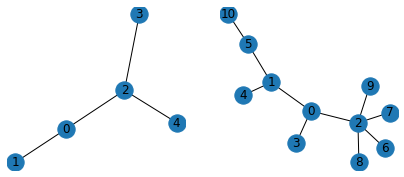

In [4]:
import networkx as nx, matplotlib.pyplot as plt
%matplotlib inline
#隣接リストをnx形式に変換（枝を加える）→描画
def drawAdjlistUsingNx(nx_tree, list_adjlist, dic_pos, axval):
    for node1 in range(0, len(list_adjlist)):
        for node2 in list_adjlist[node1]:
            nx_tree.add_edge(node1, node2)
    axval.set_axis_off()
    nx.draw_networkx(nx_tree, pos=dic_pos, ax=axval)
#2つの木を描画
fig, npar_axval = plt.subplots(1, 2, figsize=(7, 3))
#1
list_adjlist_test1=[[1, 2], [], [3, 4], [], []]; nx_tree1 = nx.Graph()
drawAdjlistUsingNx(nx_tree1, list_adjlist_test1, None, npar_axval[0])
#2
list_adjlist_test2=[[1, 2, 3], [4, 5], [6, 7, 8, 9], [], [], [10], [], [], [], [], []]; nx_tree2 = nx.Graph()
drawAdjlistUsingNx(nx_tree2, list_adjlist_test2, None, npar_axval[1])

以下のセルを実行すると解答セルのプログラムの計算量を自動的に評価します。
* ローカル環境で解答している人はファイルを保存してから以下のセルをそのまま実行して下さい（このファイルと同じフォルダ内に `utaadevalcpx.py` があることを確認して下さい）。
* Colaboratoryを利用している人はセル内部の `str_code_3_1  = '''...'''` の `...` に自分の解答をコピペして下さい（ファイル冒頭のデータのダウンロードを事前に行う必要があります）。
`

ただし、常に正しい計算量を求められる訳ではありません（<font color="red">正しく求められなかった場合、実際の計算量よりも計算量が少なく求まります</font>）。例えば、以下の様な内容のコードは正しく評価できないことがあります。
* 組み込み関数などの名前を別名に変更している
* 条件式の使用（例えば、for文中のif文＋`break`など）
* while文を使用する

この課題の模範解答の時間計算量は<font color="white"> $O(n)$ </font>です。（←白黒反転しています）  
想像（模範解答）よりも大きな計算量となっている場合、どこに問題があるのか考えてみて下さい。

正しく計算量が評価できていないと思った場合、感想などで教えて下さい。
* Pythonのバージョンが3.7より大きいと、正しく評価されない様です（Colab.は3.7です）。

In [7]:
import utaadevalcpx;dic_varinfo_3_1 = {"list_adjlist": ["list", set(), {"n"}],"list_adjlist*": ["list", set(), {"k"}],}
str_code_3_1 = '''...'''
utaadevalcpx.evaluateCpx(str_exfilename, "3-1", dic_varinfo_3_1, str_code_3_1) # str_exfilenameはファイルの冒頭で定義されています

('時間計算量：O(n), ',
 '領域計算量：O(nn)\n',
 '解答のコードには適宜コメントを入れて下さい。正しくても評価者が読解できない場合は減点となる可能性があります。')

<b>問題の難易度評価：</b>
下のセルにこの問の難易度を5段階（1:簡単、2:やや簡単、3:普通、4:やや難しい、5:難しい）で評価して下さい。（次回以降の課題の難易度の調整に使います）
また、解答するのにかかった時間や感想などがあれば適宜記載して下さい。

In [6]:
#難易度（1:簡単、2:やや簡単、3:普通、4:やや難しい、5:難しい）
# 1
#感想
# Colaboratoryで実行すると，正しく計算されました．
# ローカルではPythonのバージョンを3.6, 3.7, 3.8, 3.9どれで実行しても正しく評価されませんでした．

## 2. 親の一覧の取得


木構造を構成する各点の親を求める関数を作成して下さい。

具体的には、木構造を表す隣接リスト `list_adjlist` が引数として与えられたとき、 各点の親の名前（番号）を格納したリスト `list_parent` を返す関数 `getParents` を作成して下さい。以下の点に注意して解答して下さい。

1. 各点は `0` 以上の整数で表されます。
2. 根を表す番号は `0` です。
3. `list_parent` の `i` 番目の要素 `list_parent[i]` は、点 `i` の親の番号を格納します。
4. 根の親は `-1` にして下さい。


なお、各値の大きさは以下の通りとします。
* $n =$ 木構造を構成する点の数
* $k =$ 1つの点の子供の最大の数

以下のセルの `...` のところを書き換えて解答して下さい。

In [45]:
### この行のコメントを改変してはいけません %3-2% ### 
#解答用セル
def getParents(list_adjlist):
    list_parent = [0]*len(list_adjlist)
    for i in range(len(list_adjlist)):
        if list_adjlist[i] != []:
            for j in list_adjlist[i]:
                list_parent[j] = i
    list_parent[0] = -1
    return list_parent

以下のセルを実行して `True` が出ることを確認して下さい。 

In [48]:
list_adjlist_test1=[[1, 2], [], [3, 4], [], []]
print(getParents(list_adjlist_test1) == [-1, 0, 0, 2, 2])
list_adjlist_test2=[[1, 2, 3], [4, 5], [6, 7, 8, 9], [], [], [10], [], [], [], [], []]
print(getParents(list_adjlist_test2) == [-1, 0, 0, 0, 1, 1, 2, 2, 2, 2, 5])

True
True


なお、テストで用いている木は以下の様な形になっています。

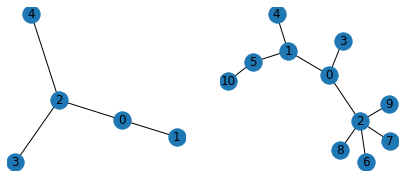

In [49]:
import networkx as nx, matplotlib.pyplot as plt
%matplotlib inline
#隣接リストをnx形式に変換（枝を加える）→描画
def drawAdjlistUsingNx(nx_tree, list_adjlist, dic_pos, axval):
    for node1 in range(0, len(list_adjlist)):
        for node2 in list_adjlist[node1]:
            nx_tree.add_edge(node1, node2)
    axval.set_axis_off()
    nx.draw_networkx(nx_tree, pos=dic_pos, ax=axval)
#2つの木を描画
fig, npar_axval = plt.subplots(1, 2, figsize=(7, 3))
#1
list_adjlist_test1=[[1, 2], [], [3, 4], [], []]; nx_tree1 = nx.Graph()
drawAdjlistUsingNx(nx_tree1, list_adjlist_test1, None, npar_axval[0])
#2
list_adjlist_test2=[[1, 2, 3], [4, 5], [6, 7, 8, 9], [], [], [10], [], [], [], [], []]; nx_tree2 = nx.Graph()
drawAdjlistUsingNx(nx_tree2, list_adjlist_test2, None, npar_axval[1])

以下のセルを実行すると解答セルのプログラムの計算量を自動的に評価します。
* ローカル環境で解答している人はファイルを保存してから以下のセルをそのまま実行して下さい（このファイルと同じフォルダ内に `utaadevalcpx.py` があることを確認して下さい）。
* Colaboratoryを利用している人はセル内部の `str_code_3_2  = '''...'''` の `...` に自分の解答をコピペして下さい（ファイル冒頭のデータのダウンロードを事前に行う必要があります）。
`

ただし、常に正しい計算量を求められる訳ではありません（<font color="red">正しく求められなかった場合、実際の計算量よりも計算量が少なく求まります</font>）。例えば、以下の様な内容のコードは正しく評価できないことがあります。
* 組み込み関数などの名前を別名に変更している
* 条件式の使用（例えば、for文中のif文＋`break`など）
* while文を使用する

この課題の模範解答の時間計算量は<font color="white"> $O(n)$ です。ただし、$O(kn)$ と計算されます。</font>（←白黒反転しています）  
想像（模範解答）よりも大きな計算量となっている場合、どこに問題があるのか考えてみて下さい。

正しく計算量が評価できていないと思った場合、感想などで教えて下さい。
* Pythonのバージョンが3.7より大きいと、正しく評価されない様です（Colab.は3.7です）。

In [50]:
import utaadevalcpx;dic_varinfo_3_2 = {"list_adjlist": ["list", set(), {"n"}],"list_adjlist*": ["list", set(), {"k"}],}
str_code_3_2 = '''...'''
utaadevalcpx.evaluateCpx(str_exfilename, "3-2", dic_varinfo_3_2, str_code_3_2) # str_exfilenameはファイルの冒頭で定義されています

('時間計算量：O(nn), ',
 '領域計算量：O(nnn)\n',
 '解答のコードには適宜コメントを入れて下さい。正しくても評価者が読解できない場合は減点となる可能性があります。')

<b>問題の難易度評価：</b>
下のセルにこの問の難易度を5段階（1:簡単、2:やや簡単、3:普通、4:やや難しい、5:難しい）で評価して下さい。（次回以降の課題の難易度の調整に使います）
また、解答するのにかかった時間や感想などがあれば適宜記載して下さい。

In [ ]:
#難易度（1:簡単、2:やや簡単、3:普通、4:やや難しい、5:難しい）
# 2
#感想
# Colaboratoryで実行すると，O(kn)で計算されました．
# ローカルではPythonのバージョンを3.6, 3.7, 3.8, 3.9どれで実行しても正しく評価されませんでした．